In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# One-hot encode categorical columns

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [5]:
# encoded the target df['y'] to 1 and 0

df['y'] = df['y'].map({'yes': 1, 'no':0})

In [6]:
# split fitur dan target

X = df_encoded.drop(['y'], axis=1)
y = df_encoded['y']

In [8]:
X.shape

(45211, 42)

In [9]:
y.shape

(45211,)

In [10]:
# split data training and data test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(31647, 42)

In [12]:
X_test.shape

(13564, 42)

In [14]:
# Use random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [15]:
# train model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# feature importance
importances = model.feature_importances_
features = X.columns

In [17]:
# Evaluasi model
# predict model yg tlah dibuat
# predict on test set
y_pred = model.predict(X_test)

In [23]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix:\n {conf_matrix}')

Confusion matrix:
 [[11653   313]
 [  963   635]]


In [24]:
# classification report
print(f'classification report:\n{classification_report(y_test, y_pred)}')

classification report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     11966
         yes       0.67      0.40      0.50      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.69      0.72     13564
weighted avg       0.89      0.91      0.90     13564



In [25]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy score:\n {accuracy}')

accuracy score:
 0.9059274550280153


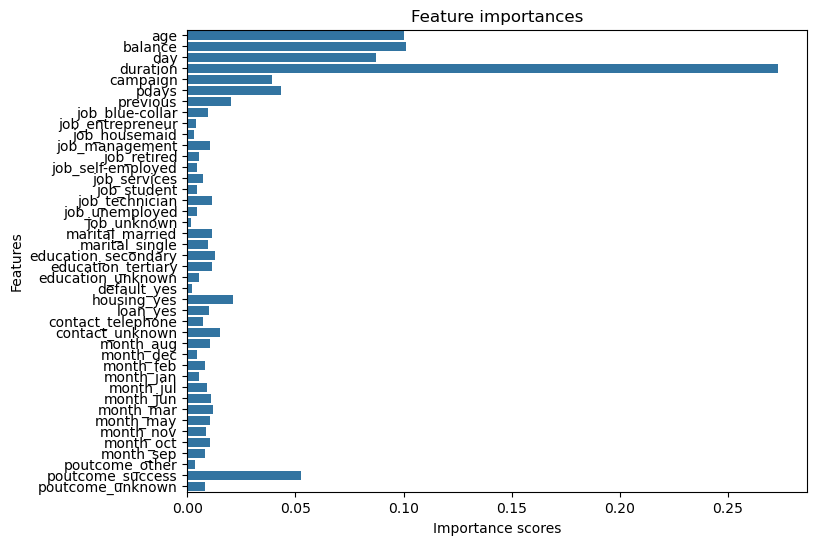

In [27]:
# feature importance visualization
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=features)
plt.title("Feature importances")
plt.xlabel("Importance scores")
plt.ylabel("Features")
plt.show()

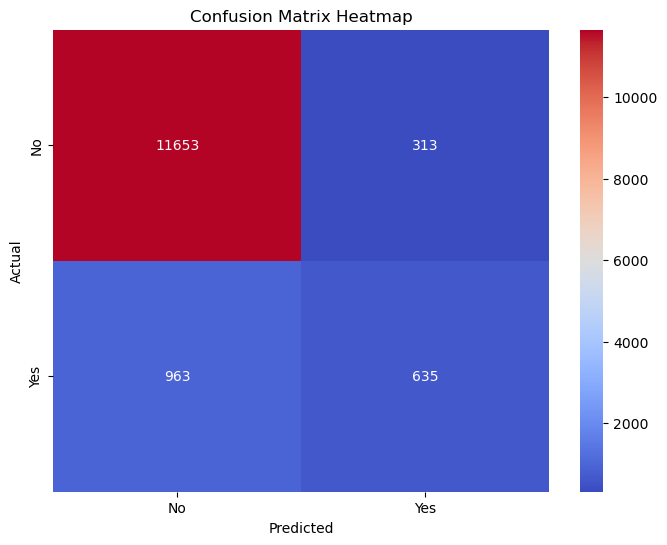

In [28]:
# confusion matrix heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()